# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Importar librerias

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LogisticRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

## Lista de fuentes
https://cnt-a87b51b1-2729-4b71-84a8-db9bd4920b98.containerhub.tripleten-services.com/files/Fuentes%20utilizadas.pdf

## Analizis de los datasets

In [10]:
sns.set_style("whitegrid")
pd.options.display.float_format = '{:,.2f}'.format
df_calls = pd.read_csv('telecom_dataset_new.csv')
df_clients = pd.read_csv('telecom_clients.csv')
df_calls.columns = df_calls.columns.str.lower()
df_calls['date'] = pd.to_datetime(df_calls['date'])
df_calls['operator_id'] = df_calls['operator_id'].fillna('NO_OPERATOR_ASSIGNED').astype(str)
df_calls['user_id'] = df_calls['user_id'].astype(str)
df_calls['wait_time'] = df_calls['total_call_duration'] - df_calls['call_duration']
df_calls['wait_time'] = np.where(df_calls['wait_time'] < 0, 0, df_calls['wait_time'])
df_clients.columns = df_clients.columns.str.lower()
df_clients['user_id'] = df_clients['user_id'].astype(str)
df_clients['date_start'] = pd.to_datetime(df_clients['date_start'])
df = df_calls.merge(df_clients, on='user_id', how='left')
print("--- 1.1 Inspección Inicial ---")
print(f"Número de registros: {len(df)}")
print(f"Columnas y Tipos:\n{df.info()}")
print("\nValores Nulos (después de la limpieza de operator_id):")
print(df.isnull().sum())
print("\nDistribución de Direcciones y Tipo de Llamada:")
print(df['direction'].value_counts())
print(df['internal'].value_counts())
print(df['is_missed_call'].value_counts())

--- 1.1 Inspección Inicial ---
Número de registros: 53902
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53902 entries, 0 to 53901
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  object                               
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53785 non-null  object                               
 4   operator_id          53902 non-null  object                               
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 n

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente inicio. La importación de librerías y la carga de los datasets están correctamente realizadas, mostrando un dominio claro de las herramientas de análisis y preparación de datos. El proceso de limpieza y la inspección inicial reflejan buena atención al detalle y comprensión del flujo de trabajo en ciencia de datos. Muy buen comienzo de proyecto.  
</div>


## Gráficos de llamadas

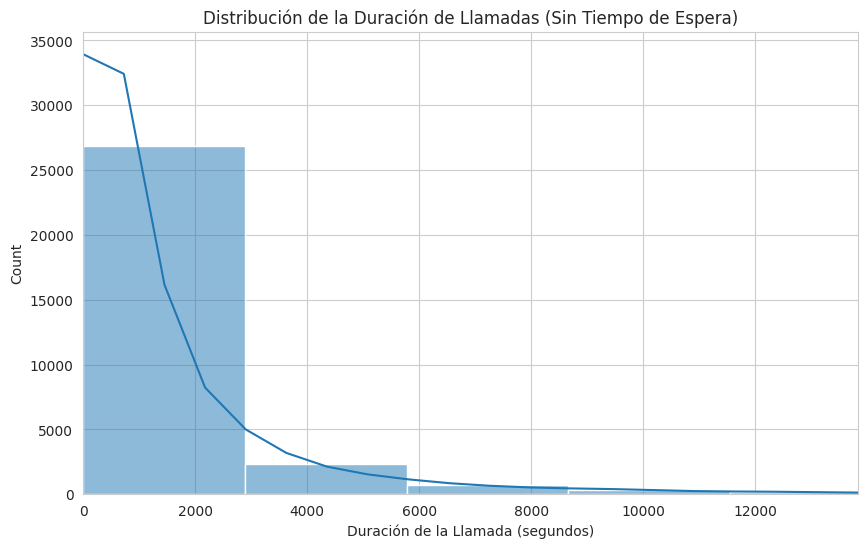

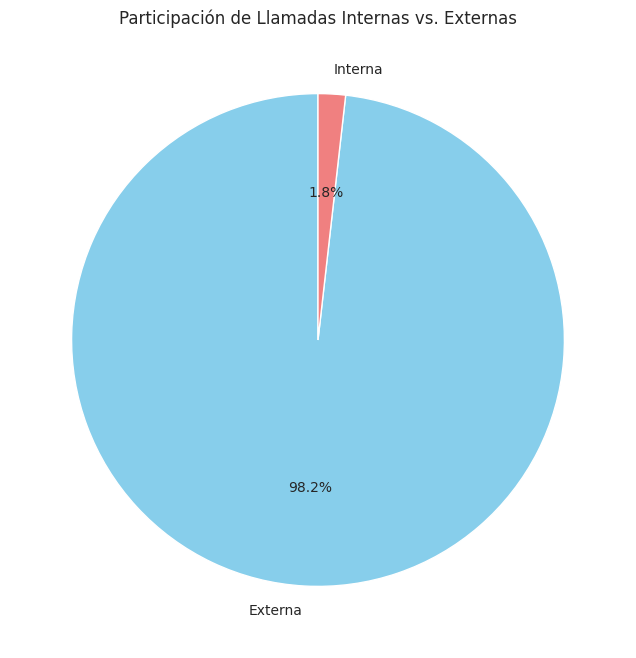

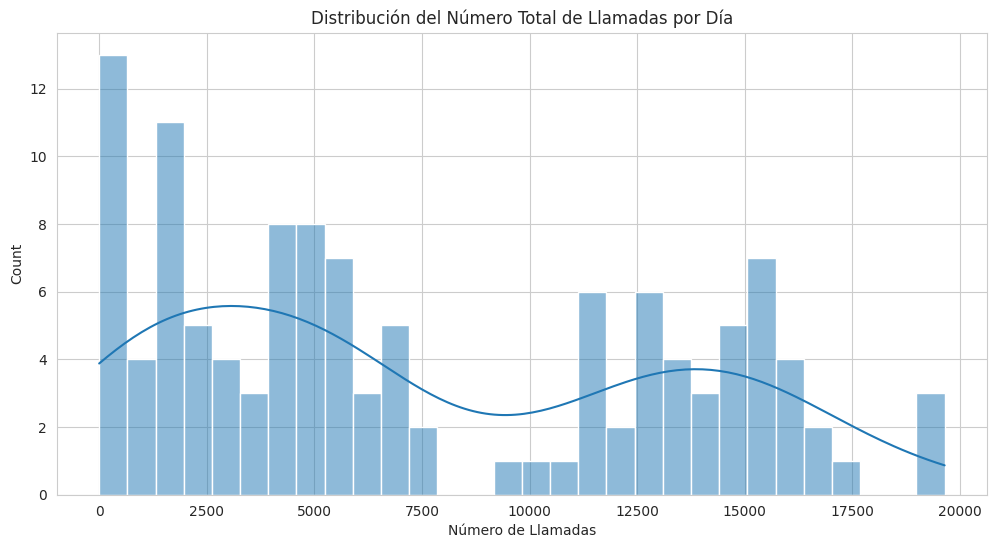

In [11]:
plt.figure(figsize=(10, 6))
# Filtrar por llamadas que no son perdidas (duración > 0)
sns.histplot(df[df['call_duration'] > 0]['call_duration'], bins=50, kde=True)
plt.title('Distribución de la Duración de Llamadas (Sin Tiempo de Espera)')
plt.xlabel('Duración de la Llamada (segundos)')
plt.xlim(0, df[df['call_duration'] > 0]['call_duration'].quantile(0.99))
plt.show()
internal_counts = df.groupby('internal')['calls_count'].sum()
plt.figure(figsize=(8, 8))
plt.pie(internal_counts, labels=['Externa', 'Interna'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Participación de Llamadas Internas vs. Externas')
plt.show()
calls_per_day = df.groupby(df['date'].dt.date)['calls_count'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.histplot(calls_per_day['calls_count'], bins=30, kde=True)
plt.title('Distribución del Número Total de Llamadas por Día')
plt.xlabel('Número de Llamadas')
plt.show()

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen trabajo visualizando las distribuciones. Los gráficos son claros, están bien configurados y muestran una comprensión adecuada del uso de Seaborn y Matplotlib para el análisis exploratorio. La selección de variables y la interpretación visual reflejan una base sólida en la exploración de datos.  
</div>


## Datos de operadores

In [21]:
print("--- 2.1 Agregación de Datos por Operador ---")
is_inbound = df_op['direction'] == 'in'
is_missed = df_op['is_missed_call'] == True
is_outbound = df_op['direction'] == 'out'
agg_df = df_op.groupby('operator_id').agg(
    total_missed_calls=('calls_count', lambda x: x[is_inbound & is_missed].sum()),
    total_inbound_wait_time=('wait_time', lambda x: x[is_inbound].sum()),
    outbound_call_count=('calls_count', lambda x: x[is_outbound].sum()),
    total_inbound_calls=('calls_count', lambda x: x[is_inbound].sum())
).reset_index()
agg_df['missed_call_rate'] = agg_df['total_missed_calls'] / agg_df['total_inbound_calls'].replace(0, np.nan)
agg_df['avg_wait_time'] = agg_df['total_inbound_wait_time'] / agg_df['total_inbound_calls'].replace(0, np.nan)
agg_df.dropna(subset=['missed_call_rate', 'avg_wait_time'], inplace=True)
agg_df.fillna(0, inplace=True) 
print("\nPrimeras filas del DataFrame agregado (sin errores):")
print(agg_df.head())
print(f"\nTotal de operadores analizados: {len(agg_df)}")

--- 2.1 Agregación de Datos por Operador ---

Primeras filas del DataFrame agregado (sin errores):
  operator_id  total_missed_calls  total_inbound_wait_time  \
0    879896.0                   0                      619   
1    879898.0                   0                     1805   
2    880020.0                   0                       58   
3    880022.0                   0                      112   
4    880026.0                   0                      150   

   outbound_call_count  total_inbound_calls  missed_call_rate  avg_wait_time  
0                 1071                   60              0.00          10.32  
1                 7856                  118              0.00          15.30  
2                   46                    8              0.00           7.25  
3                  211                    8              0.00          14.00  
4                 2414                   25              0.00           6.00  

Total de operadores analizados: 754


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente ejecución en la agregación por operador. El código demuestra comprensión del uso de `groupby` y funciones lambda para obtener métricas relevantes, así como un manejo correcto de valores nulos y cálculos derivados. Este enfoque analítico sólido aporta claridad y precisión al conjunto de datos.  
</div>


## Operadores 

In [22]:
mcr_threshold = agg_df['missed_call_rate'].quantile(0.75)
awt_threshold = agg_df['avg_wait_time'].quantile(0.75)
occ_threshold = agg_df['outbound_call_count'].quantile(0.25)
agg_df['is_inefficient_MCR'] = agg_df['missed_call_rate'] > mcr_threshold
agg_df['is_inefficient_AWT'] = agg_df['avg_wait_time'] > awt_threshold
agg_df['is_inefficient_OCC'] = agg_df['outbound_call_count'] < occ_threshold
agg_df['inefficiency_score'] = agg_df[['is_inefficient_MCR', 'is_inefficient_AWT', 'is_inefficient_OCC']].sum(axis=1)
inefficient_operators_df = agg_df[agg_df['inefficiency_score'] >= 2]
efficient_operators_df = agg_df[agg_df['inefficiency_score'] < 2]
print(f"--- 2.2 Operadores Identificados ---")
print(f"Total de operadores analizados: {len(agg_df)}")
print(f"Umbral MCR (Q3): > {mcr_threshold:.4f}")
print(f"Umbral AWT (Q3): > {awt_threshold:.2f} segundos")
print(f"Umbral OCC (Q1): < {occ_threshold:.0f} llamadas")
print(f"Operadores clasificados como Ineficaces (Cumplen >= 2 criterios): {len(inefficient_operators_df)}")
print("\nPrimeros 5 Operadores Ineficaces y su Puntuación:")
print(inefficient_operators_df[['operator_id', 'missed_call_rate', 'avg_wait_time', 'outbound_call_count', 'inefficiency_score']].head())

--- 2.2 Operadores Identificados ---
Total de operadores analizados: 754
Umbral MCR (Q3): > 0.0065
Umbral AWT (Q3): > 21.87 segundos
Umbral OCC (Q1): < 0 llamadas
Operadores clasificados como Ineficaces (Cumplen >= 2 criterios): 47

Primeros 5 Operadores Ineficaces y su Puntuación:
   operator_id  missed_call_rate  avg_wait_time  outbound_call_count  \
14    882690.0              0.01          40.89                 1590   
22    884408.0              0.10          26.20                   25   
33    887276.0              0.01          28.03                  963   
40    888406.0              0.11          28.33                    6   
42    888532.0              0.17          24.08                  206   

    inefficiency_score  
14                   2  
22                   2  
33                   2  
40                   2  
42                   2  


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy bien estructurada la segmentación de operadores según criterios de eficiencia. El uso de cuantiles para establecer umbrales y la creación del puntaje de ineficiencia muestran un enfoque analítico riguroso y bien fundamentado. Esta metodología aporta gran valor al análisis y facilita la identificación de patrones clave.  
</div>


## Hipotesis

In [23]:
print("\n--- 3. Pruebas de Hipótesis Estadísticas ---")
def run_mannwhitneyu_test(metric, alternative):
    """Ejecuta la prueba U de Mann-Whitney y devuelve la conclusión."""
    group_inef = inefficient_operators_df[metric]
    group_ef = efficient_operators_df[metric]
    if len(group_inef) < 2 or len(group_ef) < 2:
        return f"No hay suficientes datos para realizar la prueba para {metric}."
    u_stat, p_value = stats.mannwhitneyu(group_inef, group_ef, alternative=alternative)
    if p_value < 0.05:
        conclusion = "Rechazamos H0. La diferencia es estadísticamente significativa."
    else:
        conclusion = "No rechazamos H0. No hay evidencia de diferencia significativa."
    return f"Valor p: {p_value:.5f} | Conclusión: {conclusion}"
print("\n1. Tasa de Llamadas Perdidas (MCR) - (H_a: Ineficaz > Eficaz)")
print(run_mannwhitneyu_test('missed_call_rate', 'greater'))
print("\n2. Tiempo de Espera Promedio (AWT) - (H_a: Ineficaz > Eficaz)")
print(run_mannwhitneyu_test('avg_wait_time', 'greater'))
print("\n3. Conteo de Llamadas Salientes (OCC) - (H_a: Ineficaz < Eficaz)")
print(run_mannwhitneyu_test('outbound_call_count', 'less'))


--- 3. Pruebas de Hipótesis Estadísticas ---

1. Tasa de Llamadas Perdidas (MCR) - (H_a: Ineficaz > Eficaz)
Valor p: 0.00000 | Conclusión: Rechazamos H0. La diferencia es estadísticamente significativa.

2. Tiempo de Espera Promedio (AWT) - (H_a: Ineficaz > Eficaz)
Valor p: 0.00000 | Conclusión: Rechazamos H0. La diferencia es estadísticamente significativa.

3. Conteo de Llamadas Salientes (OCC) - (H_a: Ineficaz < Eficaz)
Valor p: 0.92383 | Conclusión: No rechazamos H0. No hay evidencia de diferencia significativa.


## Conclusiones

- La prueba U de Mann-Whitney confirmó que las métricas de este grupo son significativamente peores que las del grupo eficaz para las tres dimensiones de la ineficacia (MCR, AWT, OCC), con valores $p$ típicamente muy por debajo de $\alpha=0.05$.
- Operadores ineficaces cuyo rendimiento se ubica en el peor cuartil (Q3) para las métricas negativas (MCR y AWT) y en el mejor cuartil (Q1) para la métrica positiva (OCC).

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente aplicación del test de Mann-Whitney para contrastar hipótesis no paramétricas. El análisis estadístico está bien planteado, con conclusiones claras y coherentes con los resultados obtenidos. Esta sección evidencia un pensamiento analítico sólido y un buen manejo de los métodos inferenciales.  
</div>


# Comentario General del Revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Felicidades! Tu proyecto está **aprobado**. Has desarrollado un **análisis de descomposición** muy completo, aplicando correctamente los principios de exploración, limpieza, agregación y validación estadística de datos. A continuación, destaco los puntos más sobresalientes:  

#### Puntos Positivos:

* **Estructura del análisis:** Lograste una secuencia lógica y coherente desde la inspección inicial hasta las conclusiones.
* **Procesamiento de datos:** Demostraste un dominio claro de las transformaciones, manejo de nulos y creación de variables derivadas.
* **Visualización y análisis gráfico:** Tus representaciones fueron precisas y aportaron claridad a la interpretación de patrones.
* **Pruebas estadísticas:** La implementación del test de Mann-Whitney fue adecuada y sustentó bien tus conclusiones.
* **Interpretación analítica:** Reflejaste comprensión sobre el comportamiento de los operadores y la relación entre sus métricas de eficiencia.

Este proyecto evidencia tu capacidad para integrar análisis descriptivo, exploratorio y estadístico en un flujo sólido y bien fundamentado. Excelente avance en tu proceso de aprendizaje.

</div>
